<a href="https://colab.research.google.com/github/Ratna-code/statistical-analysis-/blob/main/T_Test_One_Sample_T_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**T Test**

A t-test is a type of inferential statistic which is used to determine if there is a significant difference between the means of two groups which may be related in certain features


T-test has 2 types : 1. one sampled t-test 2. two-sampled t-test.



**One-sample T-test with Python**


The test will tell us whether means of the sample and the population are different

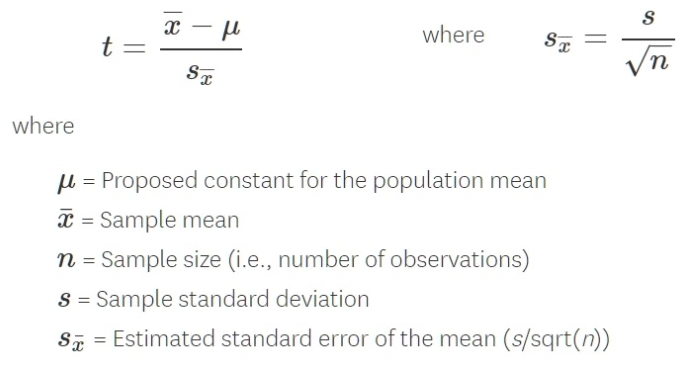

1. Mean age of population is 30 or not

**Null Hypothesis (H0):**

The mean age of the population is equal to 30 years.

**Alternate Hypothesis (H1):**

The mean age of the population is not equal to 30 years.





In [20]:
ages=[10,20,35,50,28,40,55,18,16,55,30,25,43,18,30,28,14,24,16,17,32,35,26,27,65,18,43,23,21,20,19,70]


In [21]:
len(ages)

32

In [22]:
import numpy as np

ages_mean = np.mean(ages)
print(ages_mean)

30.34375


In [23]:
## Lets take sample
sample_size = 10
age_sample = np.random.choice(ages,sample_size)
age_sample

array([16, 16, 14, 43, 18, 30, 18, 70, 35, 18])

In [24]:
from scipy.stats import ttest_1samp

ttest,p_value = ttest_1samp(age_sample,30)
print(p_value)

0.7037264337837337


In [25]:
if p_value <0.05:  # alpha value is 0.05 or 5%
  print("We are rejecting the null hypothesis")
else:
  print("we are accepting the null hypothesis")

we are accepting the null hypothesis


2. Consider the age of students in a college and in Class A



In [26]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import math
np.random.seed(6)
school_ages=stats.poisson.rvs(loc=18,mu=35,size=1500)
classA_ages=stats.poisson.rvs(loc=18,mu=30,size=60)


### Null Hypothesis (H0):
The mean age of students in Class A is equal to the mean age of students in the school.

### Alternate Hypothesis (H1):
The mean age of students in Class A is not equal to the mean age of students in the school.


In [27]:
school_ages.mean()


53.303333333333335

In [28]:
classA_ages.mean()


46.9

In [29]:
_,p_value=stats.ttest_1samp(a=classA_ages,popmean=school_ages.mean())


In [30]:
p_value


1.139027071016194e-13

In [31]:
if p_value < 0.05:    # alpha value is 0.05 or 5%
    print(" we are rejecting null hypothesis")
else:
    print("we are accepting null hypothesis")

 we are rejecting null hypothesis



**titanic-single-sample-t-test**

In [38]:
import seaborn as sns
titanic = sns.load_dataset('titanic')


In [40]:
titanic.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [42]:
pop = titanic['age'].dropna()
pop

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
885    39.0
886    27.0
887    19.0
889    26.0
890    32.0
Name: age, Length: 714, dtype: float64

In [53]:
pop_mean =pop.mean()


In [44]:
sample_age = pop.sample(25).values


In [45]:
sample_age


array([45., 58., 26., 36., 44., 47., 21., 36., 49., 25., 41., 26., 20.,
       17., 38., 35., 46., 24., 22., 23., 22., 15., 51., 30., 35.])

- **Null Hypothesis (H0):** The mean age of the passengers on the Titanic was 30 years.
- **Alternate Hypothesis (H1):** The mean age of the passengers on the Titanic was not 30 years.

In [47]:
# check for normality using Shapiro Wilk test
from scipy.stats import shapiro
shapiro_age = shapiro(sample_age)
print(shapiro_age)

ShapiroResult(statistic=0.9502826929092407, pvalue=0.2544291913509369)


In [50]:

if shapiro_age[1] > 0.05:
    print('Data is normally distributed')
else:
    print('Data is not normally distributed')


Data is normally distributed


In [54]:
import scipy.stats as stats

t_statistic, p_value = stats.ttest_1samp(sample_age, pop_mean)

print("t-statistic:", t_statistic)
print("p-value:", p_value/2)

t-statistic: 1.4965794541874553
p-value: 0.07376946253335548


In [55]:
alpha = 0.05

if p_value < alpha:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis.")

Fail to reject the null hypothesis.




**Conclusion:**

**1. Mean age of population is 30 or not:**

Based on the t-test results, we fail to reject the null hypothesis. This means that there is not enough evidence to conclude that the mean age of the population is different from 30 years.

**2. Consider the age of students in a college and in Class A:**

Based on the t-test results, we reject the null hypothesis. This means that there is enough evidence to conclude that the mean age of students in Class A is different from the mean age of students in the school.

**3. Titanic-single-sample-t-test:**

Based on the Shapiro-Wilk test, the sample data is normally distributed. The t-test results show that we fail to reject the null hypothesis. This means that there is not enough evidence to conclude that the mean age of the passengers on the Titanic was different from 30 years.